In [2]:
# Import modules
import cv2
import matplotlib.pyplot as plt
#from dataPath import DATA_PATH
import numpy as np
%matplotlib inline

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.interpolation'] = 'bilinear'

In [4]:
# Implement Variance of absolute values of Laplacian - Method 1
# Input: image
# Output: Floating point number denoting the measure of sharpness of image

# Do NOT change the function name and definition

def var_abs_laplacian(image):
    
    imgray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    lap = cv2.Laplacian(imgray, cv2.CV_32F, ksize = 3, 
                            scale = 1, delta = 0)
    
    delta = lambda t: (np.abs(t)-np.mean(np.abs(lap)))**2
    var_lap_array = np.array([delta(xi) for xi in lap])
    return np.sum(var_lap_array)

In [5]:
# Implement Sum Modified Laplacian - Method 2
# Input: image
# Output: Floating point number denoting the measure of sharpness of image

# Do NOT change the function name and definition

def sum_modified_laplacian(im):
    step=3
    thresh=7
    gy=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    (wx,wy)=gy.shape
    ML=[]
    for i in range(step,wx-step):
        for j in range(step,wy-step):
            sml=abs(2*gy[i,j]-gy[i-step,j]-gy[i+step,j])+ \
                     abs(2*gy[i,j]-gy[i,j-step]-gy[i,j+step])
            if sml>=thresh:
                ML.append(sml)
    
    return sum(ML)

In [6]:
# Read input video filename
filename = 'focus-test.mp4'

# Create a VideoCapture object
cap = cv2.VideoCapture(filename)

# Read first frame from the video
ret, frame = cap.read()

# Display total number of frames in the video
print("Total number of frames : {}".format(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))

maxV1 = 0
maxV2 = 0

# Frame with maximum measure of focus
# Obtained using methods 1 and 2
bestFrame1 = 0 
bestFrame2 = 0 

# Frame ID of frame with maximum measure
# of focus
# Obtained using methods 1 and 2
bestFrameId1 = 0 
bestFrameId2 = 0 

# Get measures of focus from both methods
val1 = var_abs_laplacian(frame)

val2 = sum_modified_laplacian(frame)




Total number of frames : 186


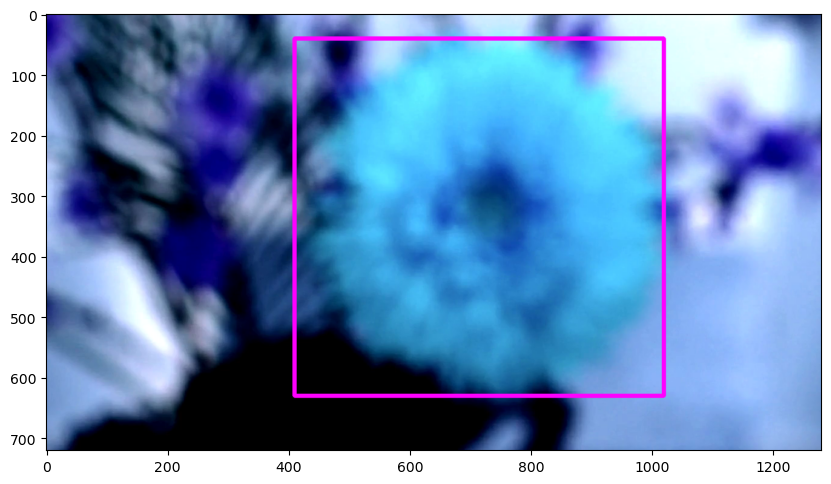

In [7]:
bo=630
ri=1020
box=frame.copy()
cv2.rectangle(box, (410, 40), (ri, bo), (255, 0, 255), thickness=5, lineType=cv2.LINE_8)
plt.imshow(box)

In [ ]:
# Specify the ROI for flower in the frame
# UPDATE THE VALUES BELOW
top = 40
left = 410
bottom = 630
right = 1020

# Iterate over all the frames present in the video
while(ret):
    # Crop the flower region out of the frame
    flower = frame[top:bottom, left:right]
    print("-----reading frame ID: {}-----".format(int(cap.get(cv2.CAP_PROP_POS_FRAMES))))
    
    # Get measures of focus from both methods
    val1 = var_abs_laplacian(flower)
    val2 = sum_modified_laplacian(flower)
    
    # If the current measure of focus is greater 
    # than the current maximum
    if val1 > maxV1 :
        # Revise the current maximum
        maxV1 = val1
        # Get frame ID of the new best frame
        bestFrameId1 = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
        # Revise the new best frame
        bestFrame1 = frame.copy()
        print("Frame ID of the best frame [Method 1]: {}".format(bestFrameId1))
    
    
    # If the current measure of focus is greater 
    # than the current maximum
    if val2 > maxV2 : 
        # Revise the current maximum
        maxV2 = val2
        # Get frame ID of the new best frame
        bestFrameId2 = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
        # Revise the new best frame
        bestFrame2 = frame.copy()
        print("Frame ID of the best frame [Method 2]: {}".format(bestFrameId2))
         
    # Read a new frame
    ret, frame = cap.read()


print("================================================")
# Print the Frame ID of the best frame
print("Frame ID of the best frame [Method 1]: {}".format(bestFrameId1))
print("Frame ID of the best frame [Method 2]: {}".format(bestFrameId2))

# Release the VideoCapture object
cap.release()


# Stack the best frames obtained using both methods
out = np.hstack((bestFrame1, bestFrame2))

# Display the stacked frames
plt.figure()
plt.imshow(out[:,:,::-1]);
plt.axis('off');



-----reading frame ID: 1-----
Frame ID of the best frame [Method 1]: 1
Frame ID of the best frame [Method 2]: 1
-----reading frame ID: 2-----
-----reading frame ID: 3-----
-----reading frame ID: 4-----
-----reading frame ID: 5-----
-----reading frame ID: 6-----
-----reading frame ID: 7-----
-----reading frame ID: 8-----
-----reading frame ID: 9-----
Frame ID of the best frame [Method 1]: 9
-----reading frame ID: 10-----
-----reading frame ID: 11-----
-----reading frame ID: 12-----
-----reading frame ID: 13-----
-----reading frame ID: 14-----
-----reading frame ID: 15-----
-----reading frame ID: 16-----
-----reading frame ID: 17-----
-----reading frame ID: 18-----
-----reading frame ID: 19-----
-----reading frame ID: 20-----
-----reading frame ID: 21-----
-----reading frame ID: 22-----
-----reading frame ID: 23-----
-----reading frame ID: 24-----
-----reading frame ID: 25-----
-----reading frame ID: 26-----
-----reading frame ID: 27-----
-----reading frame ID: 28-----
-----reading frame